In [136]:
# PART 1

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

In [138]:
data = pd.read_csv('california_housing.csv')
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_above_median
0,2.1827,26.0,4.521429,0.921429,305.0,2.178571,40.05,-122.10,0
1,3.0755,32.0,4.623068,0.983353,3868.0,4.599287,32.77,-117.06,0
2,1.8235,40.0,4.701149,1.126437,928.0,3.555556,37.75,-122.16,0
3,1.4625,37.0,4.247845,1.105603,1673.0,3.605603,33.99,-118.28,0
4,1.9063,13.0,3.453125,0.984375,286.0,4.468750,33.97,-118.16,0


In [139]:
data.shape

(20634, 9)

In [140]:
data.size

185706

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20634 entries, 0 to 20633
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20634 non-null  float64
 1   HouseAge            20634 non-null  float64
 2   AveRooms            20634 non-null  float64
 3   AveBedrms           20634 non-null  float64
 4   Population          20634 non-null  float64
 5   AveOccup            20634 non-null  float64
 6   Latitude            20634 non-null  float64
 7   Longitude           20634 non-null  float64
 8   price_above_median  20634 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.4 MB


In [142]:
data.isnull().sum() # no null values

MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
price_above_median    0
dtype: int64

In [143]:
data.duplicated().sum() # no duplicated rows

0

In [144]:
data['MedInc'].unique()

array([2.1827, 3.0755, 1.8235, ..., 1.7311, 4.3487, 5.679 ])

In [145]:
data['HouseAge'].unique()

array([26., 32., 40., 37., 13., 49., 34., 39., 35., 22., 24., 19., 27.,
       25., 10., 43., 21.,  3., 36.,  6., 23., 38., 50., 52., 48., 15.,
       42., 47., 12., 29., 44., 11., 31., 20.,  7., 17., 45., 18., 14.,
       28., 16., 41., 30., 33.,  4., 46.,  5.,  8.,  9., 51.,  2.,  1.])

In [146]:
data['AveRooms'].unique()

array([4.52142857, 4.62306778, 4.70114943, ..., 5.78947368, 5.27522936,
       5.25373134])

In [147]:
data['AveBedrms'].unique()

array([0.92142857, 0.98335315, 1.12643678, ..., 1.02999434, 1.01364629,
       1.01171459])

In [148]:
data['Population'].unique()

array([ 305., 3868.,  928., ..., 7984., 3717., 6330.])

In [149]:
data['AveOccup'].unique()

array([2.17857143, 4.59928656, 3.55555556, ..., 2.34185304, 3.52838428,
       3.93859649])

In [150]:
data['Latitude'].unique()

array([40.05, 32.77, 37.75, 33.99, 33.97, 37.78, 34.05, 33.96, 35.33,
       36.72, 34.1 , 38.43, 37.74, 38.25, 34.12, 33.74, 33.2 , 37.77,
       37.32, 34.02, 32.75, 36.85, 40.78, 38.53, 36.77, 38.41, 32.81,
       38.04, 40.39, 38.59, 36.09, 32.71, 33.95, 33.21, 34.11, 37.96,
       37.66, 38.54, 40.55, 39.59, 39.43, 37.12, 35.99, 35.32, 36.68,
       37.35, 33.87, 35.31, 36.75, 39.06, 32.61, 33.92, 36.21, 34.03,
       38.28, 34.01, 34.51, 40.67, 32.73, 33.94, 33.15, 34.09, 36.6 ,
       38.57, 37.79, 38.62, 36.38, 34.41, 39.15, 39.25, 41.31, 38.58,
       33.98, 32.85, 37.73, 33.78, 32.62, 38.01, 39.46, 36.62, 32.57,
       32.69, 36.59, 32.8 , 36.57, 38.27, 36.83, 34.96, 38.33, 41.23,
       36.29, 38.49, 32.67, 33.91, 33.82, 39.75, 34.15, 36.79, 39.28,
       33.73, 41.54, 34.13, 34.06, 36.2 , 33.25, 38.16, 33.68, 37.82,
       39.76, 34.59, 38.71, 33.93, 33.84, 38.13, 39.83, 38.14, 37.4 ,
       36.61, 32.58, 34.65, 39.51, 37.84, 34.37, 34.  , 38.11, 38.56,
       36.08, 36.73,

In [151]:
data['Longitude'].unique()

array([-122.1 , -117.06, -122.16, -118.28, -118.16, -122.17, -118.29,
       -119.02, -120.08, -118.17, -121.83, -120.91, -121.3 , -116.05,
       -116.41, -117.25, -122.24, -120.5 , -117.95, -117.23, -119.74,
       -124.15, -121.41, -121.76, -121.38, -115.38, -120.3 , -122.27,
       -121.31, -119.99, -117.13, -118.21, -117.41, -118.24, -120.97,
       -121.46, -122.37, -121.74, -121.52, -120.27, -121.44, -118.1 ,
       -117.76, -119.96, -119.03, -119.76, -121.84, -118.18, -119.04,
       -119.75, -121.55, -117.5 , -119.08, -117.96, -120.65, -118.32,
       -117.24, -122.38, -115.52, -118.25, -117.34, -118.23, -121.86,
       -122.2 , -122.87, -119.21, -117.28, -117.3 , -123.22, -121.06,
       -122.22, -122.3 , -121.5 , -118.31, -115.57, -121.92, -117.18,
       -117.09, -118.34, -121.32, -123.84, -119.68, -117.07, -119.61,
       -116.96, -119.67, -122.06, -119.8 , -120.42, -122.71, -119.12,
       -115.49, -118.09, -117.04, -118.26, -118.22, -122.23, -118.2 ,
       -117.93, -120

In [152]:
data['price_above_median'].unique()

array([0, 1])

In [153]:
data['price_above_median'] = data['price_above_median'].astype("category") # changed to categorical because there are only two values

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20634 entries, 0 to 20633
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   MedInc              20634 non-null  float64 
 1   HouseAge            20634 non-null  float64 
 2   AveRooms            20634 non-null  float64 
 3   AveBedrms           20634 non-null  float64 
 4   Population          20634 non-null  float64 
 5   AveOccup            20634 non-null  float64 
 6   Latitude            20634 non-null  float64 
 7   Longitude           20634 non-null  float64 
 8   price_above_median  20634 non-null  category
dtypes: category(1), float64(8)
memory usage: 1.3 MB


In [155]:
data.groupby(['price_above_median'])['MedInc'].mean() # we can see that when the price is above the median, the median income is also significantly higher.

/tmp/ipykernel_9308/2857442325.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['price_above_median'])['MedInc'].mean() # we can see that when the price is above the median, the median income is also significantly higher.


price_above_median
0    2.878883
1    4.862708
Name: MedInc, dtype: float64

In [156]:
data.groupby(['HouseAge'])['MedInc'].mean() # we can see here that as the house's age gets higher, the median income decreases

HouseAge
1.0     4.003400
2.0     5.167766
3.0     5.460258
4.0     5.180673
5.0     4.697636
6.0     4.383393
7.0     4.464457
8.0     4.459338
9.0     4.316425
10.0    4.059077
11.0    3.932593
12.0    3.988412
13.0    4.150874
14.0    4.119897
15.0    4.062967
16.0    4.293998
17.0    3.935827
18.0    3.977344
19.0    3.760389
20.0    3.778618
21.0    3.852120
22.0    3.922650
23.0    3.951940
24.0    3.911442
25.0    4.119936
26.0    4.076914
27.0    3.853651
28.0    3.752313
29.0    3.580305
30.0    3.587635
31.0    3.607926
32.0    3.778895
33.0    3.832625
34.0    3.984903
35.0    3.913107
36.0    3.935958
37.0    3.747540
38.0    3.446261
39.0    3.440596
40.0    3.456350
41.0    3.170057
42.0    3.431315
43.0    3.211136
44.0    3.503119
45.0    3.665441
46.0    3.398138
47.0    3.290915
48.0    3.473160
49.0    3.550495
50.0    3.444289
51.0    3.423648
52.0    3.886150
Name: MedInc, dtype: float64

In [157]:
data['MedInc'].mean()

3.8707953668702144

In [158]:
data['MedInc'].median()

3.5349500000000003

In [159]:
data['HouseAge'].mean()

28.64039934089367

In [160]:
data['HouseAge'].median()

29.0

In [161]:
data['AveRooms'].mean()

5.429171459679152

In [162]:
data['AveRooms'].median()

5.229190074906367

In [163]:
data['AveBedrms'].mean()

1.0966277345261177

In [164]:
data['AveBedrms'].median()

1.048780487804878

In [165]:
data['Population'].mean() # the mean of the population is significantly higher than the median. this suggests that there are outliers in the data.

1425.3980808374527

In [166]:
data['Population'].median()

1166.0

In [167]:
data['AveOccup'].mean()

3.0704492334153453

In [168]:
data['AveOccup'].median()

2.817936914971134

In [169]:
data['Latitude'].mean()

35.63172239992246

In [170]:
data['Latitude'].median()

34.26

In [171]:
data['Longitude'].mean()

-119.56959435882523

In [172]:
data['Longitude'].median()

-118.49

In [173]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000
mean,3.870795,28.640399,5.429171,1.096628,1425.398081,3.070449,35.631722,-119.569594
std,1.899796,12.584629,2.474393,0.473929,1132.137403,10.387501,2.135738,2.003457
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563925,18.000000,4.440930,1.006067,787.000000,2.429649,33.930000,-121.800000
50%,3.534950,29.000000,5.229190,1.048780,1166.000000,2.817937,34.260000,-118.490000
75%,4.743550,37.000000,6.052381,1.099499,1725.000000,3.282249,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


we can also use univariate analysis to put all of these values in a table. 
using this, we can also see something else that seems out of place. the standard deviation for the house age is relatively high compared to the mean.
this indicates that the ages of the different houses vary a lot within the block.

the average bedrooms column also shows something interesting. both the mean and median reside around 1 bedroom, however, the max number is 34.07 bedrooms. this also indicates another outlier. the same is true for the average rooms.

<Axes: xlabel='MedInc', ylabel='Count'>

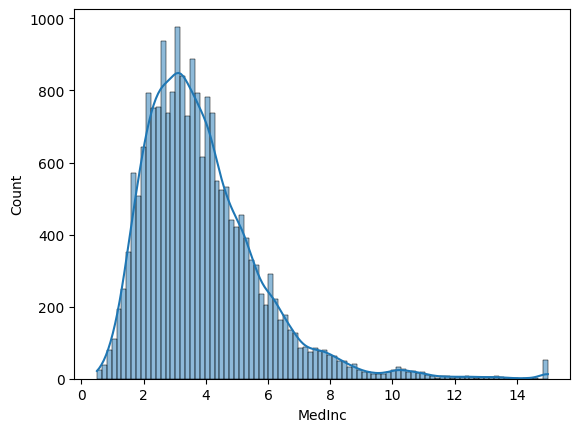

In [174]:
sns.histplot(data=data['MedInc'], kde=True)

<Axes: xlabel='MedInc'>

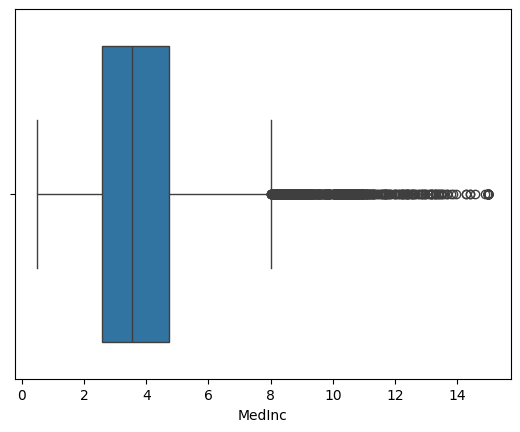

In [175]:
sns.boxplot(data=data, x='MedInc')

<Axes: xlabel='HouseAge', ylabel='Count'>

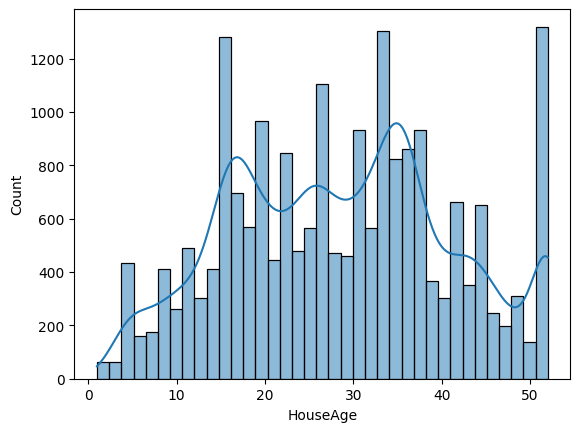

In [176]:
sns.histplot(data=data['HouseAge'], kde=True)

<Axes: xlabel='HouseAge'>

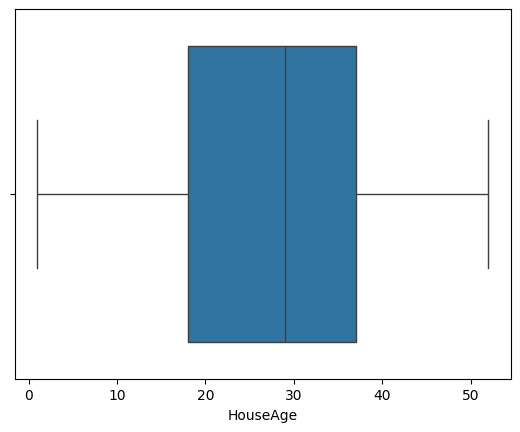

In [177]:
sns.boxplot(data=data, x='HouseAge')

<Axes: xlabel='AveRooms', ylabel='Count'>

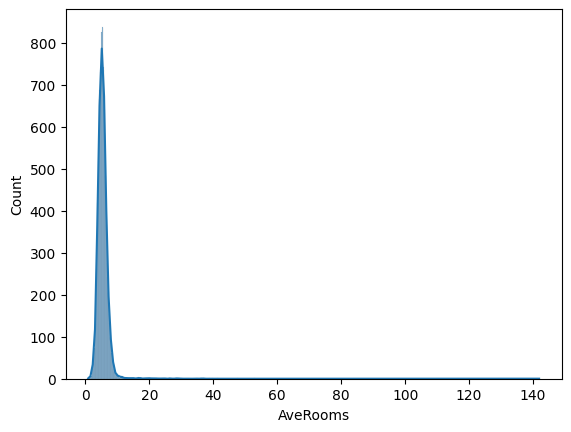

In [178]:
sns.histplot(data=data['AveRooms'], kde=True)

<Axes: xlabel='AveRooms'>

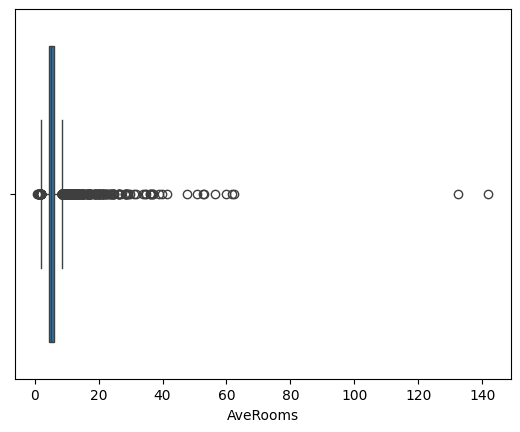

In [179]:
sns.boxplot(data=data, x='AveRooms')

<Axes: xlabel='AveBedrms', ylabel='Count'>

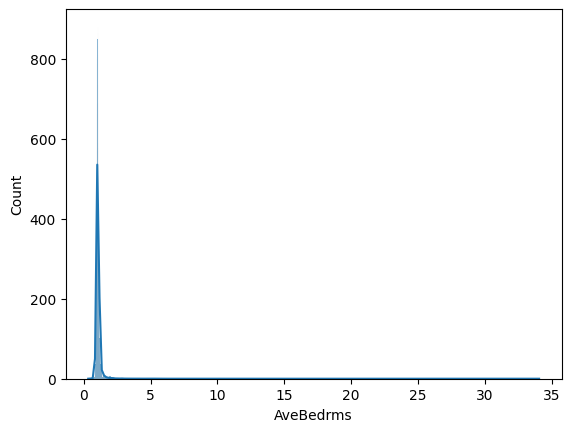

In [180]:
sns.histplot(data=data['AveBedrms'], kde=True)

<Axes: xlabel='AveBedrms'>

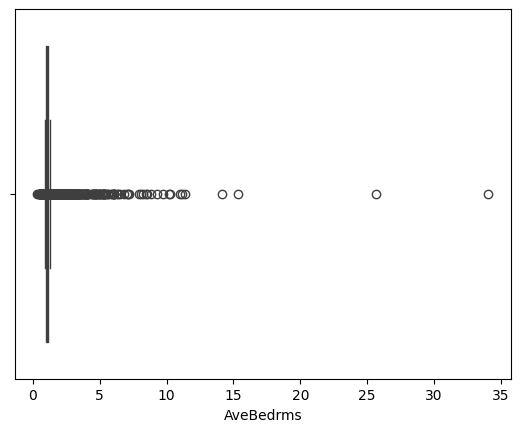

In [181]:
sns.boxplot(data=data, x='AveBedrms')

<Axes: xlabel='Population', ylabel='Count'>

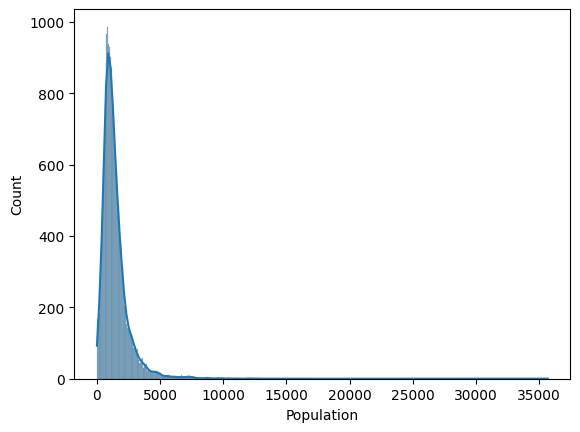

In [182]:
sns.histplot(data=data['Population'], kde=True)

<Axes: xlabel='Population'>

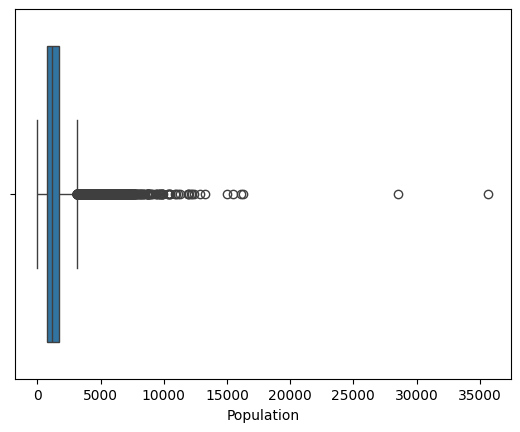

In [183]:
sns.boxplot(data=data, x='Population')

<Axes: xlabel='AveOccup', ylabel='Count'>

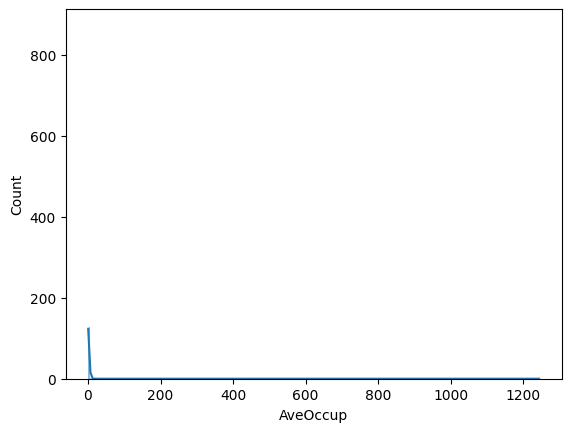

In [184]:
sns.histplot(data=data['AveOccup'], kde=True)

<Axes: xlabel='AveOccup'>

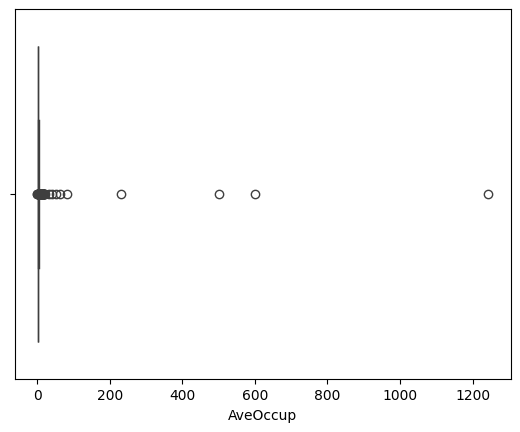

In [185]:
sns.boxplot(data=data, x='AveOccup')

<Axes: xlabel='Latitude', ylabel='Count'>

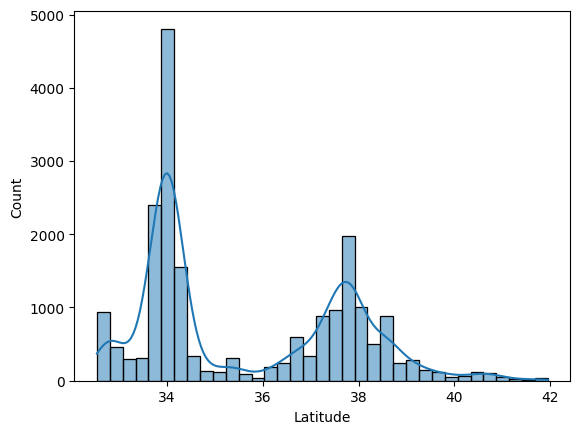

In [186]:
sns.histplot(data=data['Latitude'], kde=True)

<Axes: xlabel='Latitude'>

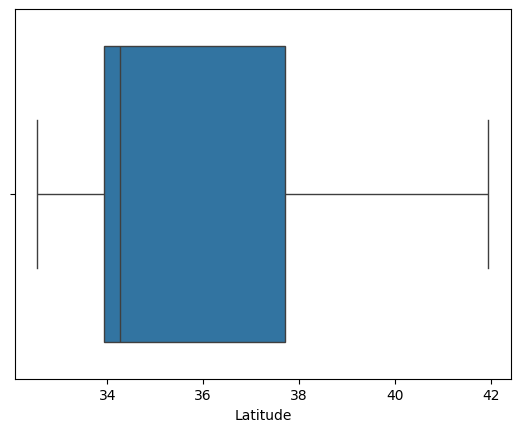

In [187]:
sns.boxplot(data=data, x='Latitude')

<Axes: xlabel='Longitude', ylabel='Count'>

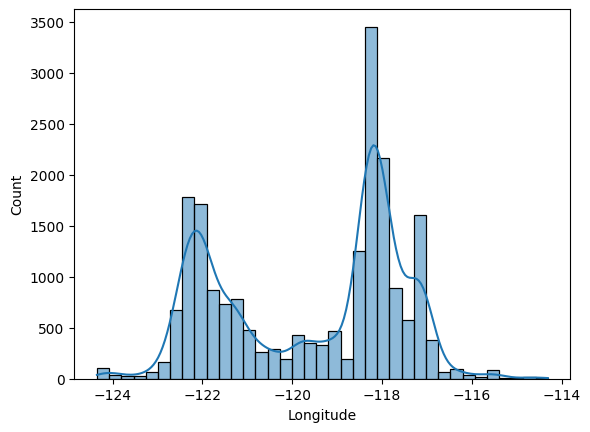

In [188]:
sns.histplot(data=data['Longitude'], kde=True)

<Axes: xlabel='Longitude'>

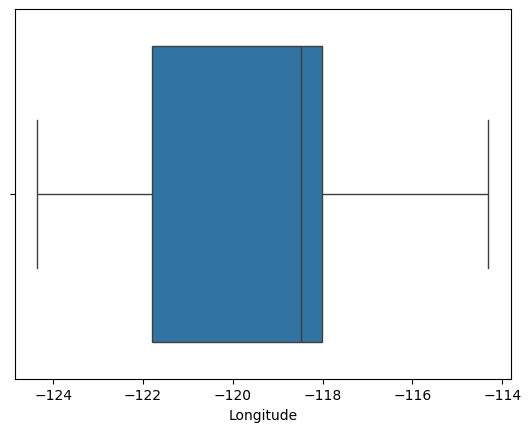

In [189]:
sns.boxplot(data=data, x='Longitude')

we can see significant outliers within a lot of these plots. for example, the plots for average rooms, average bedrooms, population, and average occupancy are heavily skewed to the right.

other observations:
- the histogram for the median income displays a bell-curve shape that is also skewed to the right.
- house age, latitude, and longitude don't seem to have any noticeable trends within the plot.

<function matplotlib.pyplot.show(close=None, block=None)>

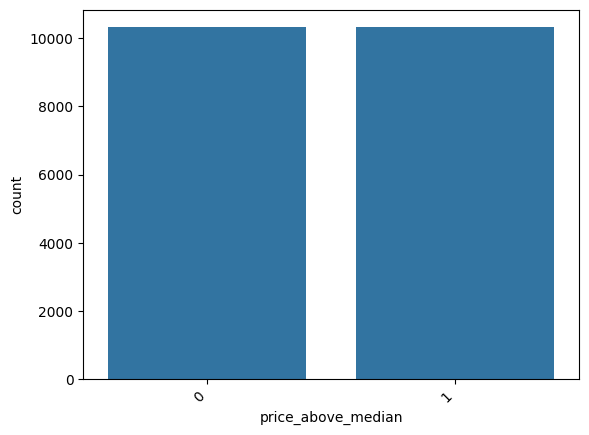

In [190]:
sns.countplot(x=data['price_above_median'])
plt.xticks(rotation=45, ha='right')
plt.show

In [191]:
# PART 2

In [192]:
data = pd.get_dummies(data, columns=["price_above_median"], drop_first=True) # perform one-hot encoding to prepare for training
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20634 entries, 0 to 20633
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MedInc                20634 non-null  float64
 1   HouseAge              20634 non-null  float64
 2   AveRooms              20634 non-null  float64
 3   AveBedrms             20634 non-null  float64
 4   Population            20634 non-null  float64
 5   AveOccup              20634 non-null  float64
 6   Latitude              20634 non-null  float64
 7   Longitude             20634 non-null  float64
 8   price_above_median_1  20634 non-null  bool   
dtypes: bool(1), float64(8)
memory usage: 1.3 MB


In [193]:
X = data.drop('price_above_median_1',axis=1)
y = data['price_above_median_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [194]:
# K-Nearest Neighbor Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

accuracy_test = accuracy_score(y_test, knn.predict(X_test))
accuracy_train = accuracy_score(y_train, knn.predict(X_train))
recall_test = recall_score(y_test, knn.predict(X_test))
recall_train = recall_score(y_train, knn.predict(X_train))
precision_test = precision_score(y_test, knn.predict(X_test))
precision_train = precision_score(y_train, knn.predict(X_train))
f1_test = f1_score(y_test, knn.predict(X_test))
f1_train = f1_score(y_train, knn.predict(X_train))

print(f'Accuracy of KNN on test data: {accuracy_test:.2f}')
print(f'Accuracy of KNN on train data: {accuracy_train:.2f}')
print(f'Recall on test: {recall_test:.2f}, Recall on train: {recall_train:.2f}')
print(f'Precision on test: {precision_test:.2f}, Precision on train: {precision_train:.2f}')
print(f'F1-score on test: {f1_test:.2f}, F1-score on train: {f1_train:.2f}')
print(f"\nPerformance on TEST\n*******************\n{classification_report(y_test, knn.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, knn.predict(X_train))}")


Accuracy of KNN on test data: 0.60
Accuracy of KNN on train data: 0.82
Recall on test: 0.59, Recall on train: 0.81
Precision on test: 0.60, Precision on train: 0.82
F1-score on test: 0.59, F1-score on train: 0.82

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.60      0.60      0.60      3095
        True       0.60      0.59      0.59      3096

    accuracy                           0.60      6191
   macro avg       0.60      0.60      0.60      6191
weighted avg       0.60      0.60      0.60      6191

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.81      0.82      0.82      7222
        True       0.82      0.81      0.82      7221

    accuracy                           0.82     14443
   macro avg       0.82      0.82      0.82     14443
weighted avg       0.82      0.82      0.82     14443



In [199]:
# Optimized KNN Classifier
from sklearn.model_selection import GridSearchCV

knn_search_accuracy = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 100)}
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)
knn_gscv.best_params_

{'n_neighbors': 1}

In [201]:
best_knn = knn_gscv.best_estimator_
accuracy_test = accuracy_score(y_test, best_knn.predict(X_test))
accuracy_train = accuracy_score(y_train, best_knn.predict(X_train))
recall_test = recall_score(y_test, best_knn.predict(X_test))
recall_train = recall_score(y_train, best_knn.predict(X_train))
precision_test = precision_score(y_test, best_knn.predict(X_test))
precision_train = precision_score(y_train, best_knn.predict(X_train))
f1_test = f1_score(y_test, best_knn.predict(X_test))
f1_train = f1_score(y_train, best_knn.predict(X_train))

print(f'Accuracy of Optimized KNN on test data: {accuracy_test:.2f}')
print(f'Accuracy of Optimized KNN on train data: {accuracy_train:.2f}')
print(f'Recall on test: {recall_test:.2f}, Recall on train: {recall_train:.2f}')
print(f'Precision on test: {precision_test:.2f}, Precision on train: {precision_train:.2f}')
print(f'F1-score on test: {f1_test:.2f}, F1-score on train: {f1_train:.2f}')
print(f"\nPerformance on TEST\n*******************\n{classification_report(y_test, best_knn.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, best_knn.predict(X_train))}")

Accuracy of Optimized KNN on test data: 0.60
Accuracy of Optimized KNN on train data: 1.00
Recall on test: 0.60, Recall on train: 1.00
Precision on test: 0.60, Precision on train: 1.00
F1-score on test: 0.60, F1-score on train: 1.00

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.60      0.60      0.60      3095
        True       0.60      0.60      0.60      3096

    accuracy                           0.60      6191
   macro avg       0.60      0.60      0.60      6191
weighted avg       0.60      0.60      0.60      6191

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7222
        True       1.00      1.00      1.00      7221

    accuracy                           1.00     14443
   macro avg       1.00      1.00      1.00     14443
weighted avg       1.00      1.00      1.00     14443



In [120]:
decision = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

In [121]:
# Decision Tree Classifier

accuracy_test = accuracy_score(y_test, decision.predict(X_test))
accuracy_train = accuracy_score(y_train, decision.predict(X_train))
recall_test = recall_score(y_test, decision.predict(X_test))
recall_train = recall_score(y_train, decision.predict(X_train))
precision_test = precision_score(y_test, decision.predict(X_test))
precision_train = precision_score(y_train, decision.predict(X_train))
f1_test = f1_score(y_test, decision.predict(X_test))
f1_train = f1_score(y_train, decision.predict(X_train))

print(f'Accuracy of Decision Tree on test data: {accuracy_test:.2f}')
print(f'Accuracy of Decision Tree on train data: {accuracy_train:.2f}')
print(f'Recall on test: {recall_test:.2f}, Recall on train: {recall_train:.2f}')
print(f'Precision on test: {precision_test:.2f}, Precision on train: {precision_train:.2f}')
print(f'F1-score on test: {f1_test:.2f}, F1-score on train: {f1_train:.2f}')
print(f"\nPerformance on TEST\n*******************\n{classification_report(y_test, decision.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, decision.predict(X_train))}")

Accuracy of Decision Tree on test data: 0.83
Accuracy of Decision Tree on train data: 1.00
Recall on test: 0.84, Recall on train: 1.00
Precision on test: 0.83, Precision on train: 1.00
F1-score on test: 0.84, F1-score on train: 1.00

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.84      0.83      0.83      3095
        True       0.83      0.84      0.84      3096

    accuracy                           0.83      6191
   macro avg       0.83      0.83      0.83      6191
weighted avg       0.83      0.83      0.83      6191

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7222
        True       1.00      1.00      1.00      7221

    accuracy                           1.00     14443
   macro avg       1.00      1.00      1.00     14443
weighted avg       1.00      1.00      1.00     14443



In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [123]:
model = RandomForestClassifier()
param_grid = {
   "n_estimators": np.arange(start=10, stop=100, step=2),
   "max_depth": np.arange(start=2, stop=20),
   "min_samples_leaf": np.arange(start=1, stop=5),
   "class_weight": [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8}, {0: 0.3, 1: 0.7}],
}

gscv = GridSearchCV(model, param_grid, cv=5, n_jobs=8, scoring="recall", )
gscv.fit(X_train, y_train)
gscv.best_params_

{'class_weight': {0: 0.1, 1: 0.9},
 'max_depth': 2,
 'min_samples_leaf': 1,
 'n_estimators': 28}

In [126]:
# Random Forest Classifier

accuracy_test = accuracy_score(y_test, gscv.predict(X_test))
accuracy_train = accuracy_score(y_train, gscv.predict(X_train))
recall_test = recall_score(y_test, gscv.predict(X_test))
recall_train = recall_score(y_train, gscv.predict(X_train))
precision_test = precision_score(y_test, gscv.predict(X_test))
precision_train = precision_score(y_train, gscv.predict(X_train))
f1_test = f1_score(y_test, gscv.predict(X_test))
f1_train = f1_score(y_train, gscv.predict(X_train))

print(f'Accuracy of Random Forest on test data: {accuracy_test:.2f}')
print(f'Accuracy of Random Forest on train data: {accuracy_train:.2f}')
print(f'Recall on test: {recall_test:.2f}, Recall on train: {recall_train:.2f}')
print(f'Precision on test: {precision_test:.2f}, Precision on train: {precision_train:.2f}')
print(f'F1-score on test: {f1_test:.2f}, F1-score on train: {f1_train:.2f}')
print(f"\nPerformance on TEST\n*******************\n{classification_report(y_test, gscv.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, gscv.predict(X_train))}")

Accuracy of Random Forest on test data: 0.51
Accuracy of Random Forest on train data: 0.51
Recall on test: 1.00, Recall on train: 1.00
Precision on test: 0.50, Precision on train: 0.50
F1-score on test: 0.67, F1-score on train: 0.67

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       1.00      0.01      0.03      3095
        True       0.50      1.00      0.67      3096

    accuracy                           0.51      6191
   macro avg       0.75      0.51      0.35      6191
weighted avg       0.75      0.51      0.35      6191

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       1.00      0.02      0.04      7222
        True       0.50      1.00      0.67      7221

    accuracy                           0.51     14443
   macro avg       0.75      0.51      0.35     14443
weighted avg       0.75      0.51      0.35     14443



In [129]:
# AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_stump = DecisionTreeClassifier(max_depth=1)

param_grid = {
   'learning_rate': [0.1, 0.5, 1.0],
   'n_estimators': [50, 100, 200]
}

abc = AdaBoostClassifier(estimator=decision_tree_stump, random_state=42)
grid_search = GridSearchCV(abc, param_grid, cv=3, n_jobs=8)
grid_search.fit(X_train, y_train)

accuracy_test = accuracy_score(y_test, grid_search.predict(X_test))
accuracy_train = accuracy_score(y_train, grid_search.predict(X_train))
recall_test = recall_score(y_test, grid_search.predict(X_test))
recall_train = recall_score(y_train, grid_search.predict(X_train))
precision_test = precision_score(y_test, grid_search.predict(X_test))
precision_train = precision_score(y_train, grid_search.predict(X_train))
f1_test = f1_score(y_test, grid_search.predict(X_test))
f1_train = f1_score(y_train, grid_search.predict(X_train))

print(f'Accuracy of AdaBoost on test data: {accuracy_test:.2f}')
print(f'Accuracy of AdaBoost on train data: {accuracy_train:.2f}')
print(f'Recall on test: {recall_test:.2f}, Recall on train: {recall_train:.2f}')
print(f'Precision on test: {precision_test:.2f}, Precision on train: {precision_train:.2f}')
print(f'F1-score on test: {f1_test:.2f}, F1-score on train: {f1_train:.2f}')
test_report = classification_report(y_test, grid_search.predict(X_test))
train_report = classification_report(y_train, grid_search.predict(X_train))
print(f"\nPerformance on TEST\n*******************\n{test_report}")
print(f"Performance on TRAIN\n********************\n{train_report}")

Accuracy of AdaBoost on test data: 0.88
Accuracy of AdaBoost on train data: 0.89
Recall on test: 0.88, Recall on train: 0.89
Precision on test: 0.87, Precision on train: 0.89
F1-score on test: 0.88, F1-score on train: 0.89

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.88      0.87      0.88      3095
        True       0.87      0.88      0.88      3096

    accuracy                           0.88      6191
   macro avg       0.88      0.88      0.88      6191
weighted avg       0.88      0.88      0.88      6191

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.89      0.89      0.89      7222
        True       0.89      0.89      0.89      7221

    accuracy                           0.89     14443
   macro avg       0.89      0.89      0.89     14443
weighted avg       0.89      0.89      0.89     14443



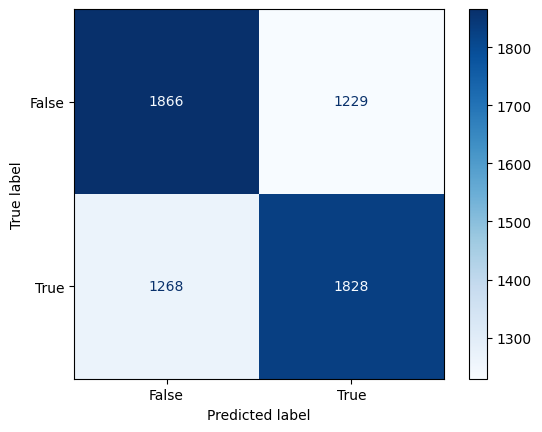

In [131]:
# KNN confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test,
                                               cmap=plt.cm.Blues,normalize=None)

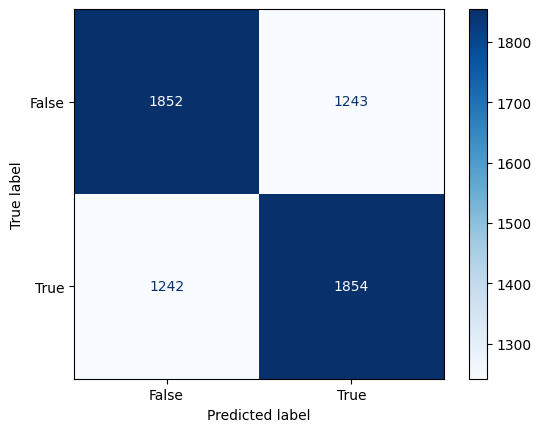

In [202]:
# Optimized KNN confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test,
                                               cmap=plt.cm.Blues,normalize=None)

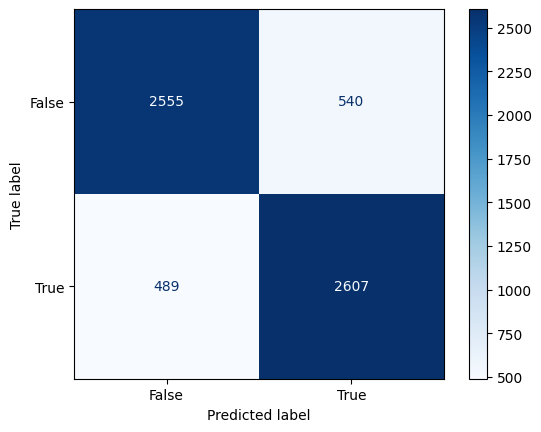

In [132]:
# Decision Tree confusion matrix

cm_display = ConfusionMatrixDisplay.from_estimator(decision, X_test, y_test,
                                               cmap=plt.cm.Blues,normalize=None)

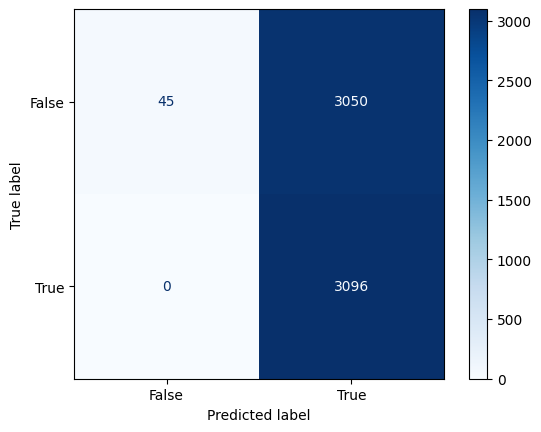

In [133]:
# Random Forrest confusion matrix

cm_display = ConfusionMatrixDisplay.from_estimator(gscv, X_test, y_test,
                                               cmap=plt.cm.Blues,normalize=None)

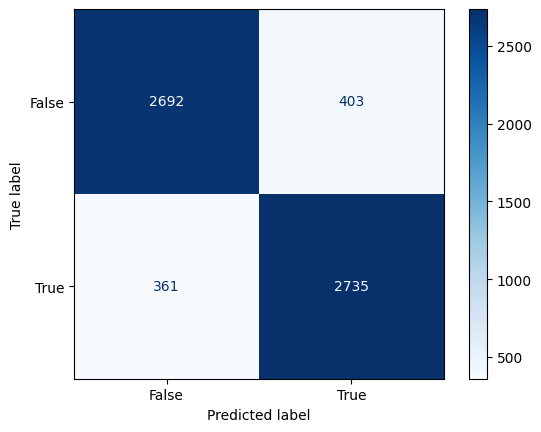

In [134]:
# AdaBoost confusion matrix

cm_display = ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test,
                                               cmap=plt.cm.Blues,normalize=None)